In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.00, high = 90.00, size = 1500)
lngs = np.random.uniform(low = -90.00, high = 90.00, size = 1500)

# zip the lats and langs together as pairs

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.

cities = []
# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count

len(cities)
    

595

In [6]:
# Import the requests library.
import requests

# import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in th eset of 50
    if(i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
     # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# To handle the errors     
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | burica
City not found. Skipping...
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | tshane
Processing Record 5 of Set 1 | abu samrah
Processing Record 6 of Set 1 | hwange
Processing Record 7 of Set 1 | oksfjord
Processing Record 8 of Set 1 | sioux lookout
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | sorland
Processing Record 11 of Set 1 | henties bay
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | kikwit
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | laguna
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | ashqelon
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | riyadh
Processing Record 21 of Set 1 | santa maria
Processing Record 

Processing Record 37 of Set 4 | murdochville
Processing Record 38 of Set 4 | saint-leu
Processing Record 39 of Set 4 | saint anthony
Processing Record 40 of Set 4 | ugoofaaru
Processing Record 41 of Set 4 | tocantinopolis
City not found. Skipping...
Processing Record 42 of Set 4 | bedele
Processing Record 43 of Set 4 | zwedru
Processing Record 44 of Set 4 | vardo
Processing Record 45 of Set 4 | yambio
Processing Record 46 of Set 4 | champua
Processing Record 47 of Set 4 | punta arenas
Processing Record 48 of Set 4 | iracoubo
Processing Record 49 of Set 4 | beni suef
Processing Record 50 of Set 4 | bam
Processing Record 1 of Set 5 | sakakah
Processing Record 2 of Set 5 | tiznit
Processing Record 3 of Set 5 | chardara
Processing Record 4 of Set 5 | malazgirt
Processing Record 5 of Set 5 | tabas
Processing Record 6 of Set 5 | marsa matruh
Processing Record 7 of Set 5 | porbandar
Processing Record 8 of Set 5 | syracuse
Processing Record 9 of Set 5 | honningsvag
Processing Record 10 of Set 

Processing Record 27 of Set 8 | sinnamary
Processing Record 28 of Set 8 | gulu
Processing Record 29 of Set 8 | krasnoarmeysk
Processing Record 30 of Set 8 | bayonet point
Processing Record 31 of Set 8 | semenivka
Processing Record 32 of Set 8 | tete
Processing Record 33 of Set 8 | statesville
Processing Record 34 of Set 8 | burhaniye
Processing Record 35 of Set 8 | puerto ayora
Processing Record 36 of Set 8 | estrela
Processing Record 37 of Set 8 | hunza
City not found. Skipping...
Processing Record 38 of Set 8 | gobabis
Processing Record 39 of Set 8 | pitimbu
Processing Record 40 of Set 8 | durban
Processing Record 41 of Set 8 | petawawa
Processing Record 42 of Set 8 | chavakachcheri
Processing Record 43 of Set 8 | cottbus
Processing Record 44 of Set 8 | kifri
Processing Record 45 of Set 8 | moose factory
Processing Record 46 of Set 8 | paidha
Processing Record 47 of Set 8 | porto santo
Processing Record 48 of Set 8 | mpigi
Processing Record 49 of Set 8 | male
Processing Record 50 of 

City not found. Skipping...
Processing Record 17 of Set 12 | sharjah
Processing Record 18 of Set 12 | choma
Processing Record 19 of Set 12 | tunduru
City not found. Skipping...
Processing Record 20 of Set 12 | danilovka
Processing Record 21 of Set 12 | guntakal
Processing Record 22 of Set 12 | san ramon
Processing Record 23 of Set 12 | tanout
Processing Record 24 of Set 12 | tocopilla
Processing Record 25 of Set 12 | ciudad bolivar
Processing Record 26 of Set 12 | at-bashi
Processing Record 27 of Set 12 | sarkand
Processing Record 28 of Set 12 | malwan
City not found. Skipping...
Processing Record 29 of Set 12 | ilabaya
Processing Record 30 of Set 12 | immokalee
Processing Record 31 of Set 12 | carupano
Processing Record 32 of Set 12 | salym
Processing Record 33 of Set 12 | benghazi
Processing Record 34 of Set 12 | baghmara
Processing Record 35 of Set 12 | santa helena de goias
Processing Record 36 of Set 12 | taoudenni
Processing Record 37 of Set 12 | qarqin
Processing Record 38 of Se

In [8]:
len(city_data)

545

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.67,-52.73,27.00,53,75,10.29,CA,2020-11-25 20:46:11
1,Tshane,-24.02,21.87,78.04,21,0,16.87,BW,2020-11-25 20:46:11
2,Abu Samrah,35.30,37.18,55.51,72,100,11.32,SY,2020-11-25 20:46:11
3,Hwange,-18.37,26.50,77.72,62,84,1.10,ZW,2020-11-25 20:46:11
4,Oksfjord,70.24,22.35,32.00,90,0,13.87,NO,2020-11-25 20:46:11
5,Sioux Lookout,50.10,-91.92,28.40,86,90,6.93,CA,2020-11-25 20:46:11
6,Georgetown,5.41,100.34,78.80,88,20,4.70,MY,2020-11-25 20:46:11
7,Sorland,67.67,12.69,33.80,69,20,3.36,NO,2020-11-25 20:46:11
8,Henties Bay,-22.12,14.28,60.01,84,25,3.00,NA,2020-11-25 20:46:12
9,Hithadhoo,-0.60,73.08,82.02,78,100,17.02,MV,2020-11-25 20:46:12


In [10]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2020-11-25 20:46:11,47.67,-52.73,27.00,53,75,10.29
1,Tshane,BW,2020-11-25 20:46:11,-24.02,21.87,78.04,21,0,16.87
2,Abu Samrah,SY,2020-11-25 20:46:11,35.30,37.18,55.51,72,100,11.32
3,Hwange,ZW,2020-11-25 20:46:11,-18.37,26.50,77.72,62,84,1.10
4,Oksfjord,NO,2020-11-25 20:46:11,70.24,22.35,32.00,90,0,13.87
5,Sioux Lookout,CA,2020-11-25 20:46:11,50.10,-91.92,28.40,86,90,6.93
6,Georgetown,MY,2020-11-25 20:46:11,5.41,100.34,78.80,88,20,4.70
7,Sorland,NO,2020-11-25 20:46:11,67.67,12.69,33.80,69,20,3.36
8,Henties Bay,NA,2020-11-25 20:46:12,-22.12,14.28,60.01,84,25,3.00
9,Hithadhoo,MV,2020-11-25 20:46:12,-0.60,73.08,82.02,78,100,17.02


In [11]:
# create an output file in CSV format

output_data_file = "weather_data/cities.csv"

# Export the city_data_df into the above csv

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [12]:
# Craete scattered plot for latitude vs maximum temperature, humidity, cloudiness, and wind speed from all the cities.
# get the data to craete the plot

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]





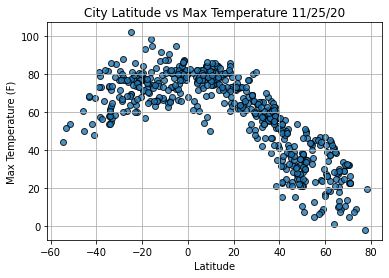

In [13]:
#Import tie module
import time

#build the scatter plot for lat vs max temperature

plt.scatter(lats, max_temps, edgecolors= "black", linewidths= 1, marker= "o", alpha= 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

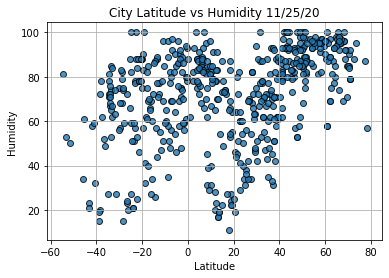

In [14]:
#build the scatter plot for lat vs humidity

plt.scatter(lats, humidity, edgecolors= "black", linewidths= 1, marker= "o", alpha= 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show Plot
plt.show()

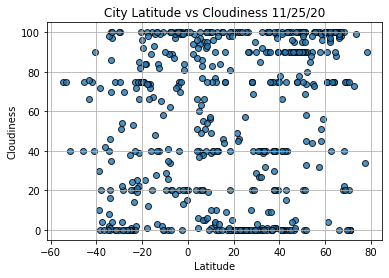

In [15]:
#build the scatter plot for lat vs Cloudiness

plt.scatter(lats, cloudiness, edgecolors= "black", linewidths= 1, marker= "o", alpha= 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show Plot
plt.show()

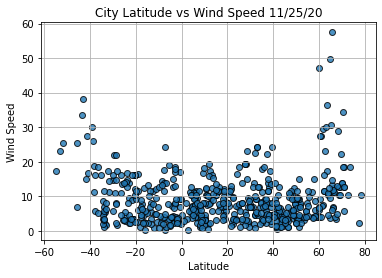

In [16]:
#build the scatter plot for lat vs Wind Speed

plt.scatter(lats, wind_speed, edgecolors= "black", linewidths= 1, marker= "o", alpha= 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show Plot
plt.show()

# Perform Linear Regression

In [20]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Relation between Lat and MAX TEMP

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

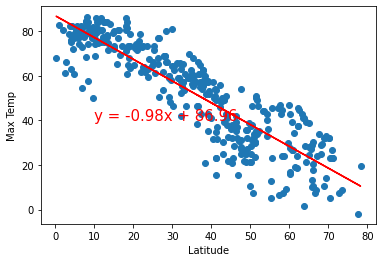

In [22]:
# Linear regression on the Northern Hemisphere for AMx Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', "Max Temp",(10,40))

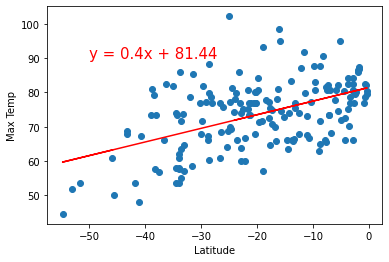

In [24]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', "Max Temp",(-50,90))

### Relation between Lat and Humidity

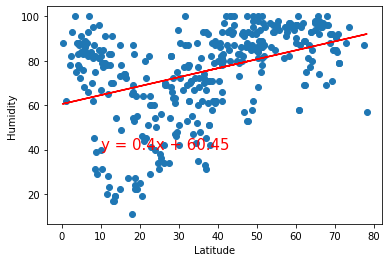

In [25]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', "Humidity",(10,40))

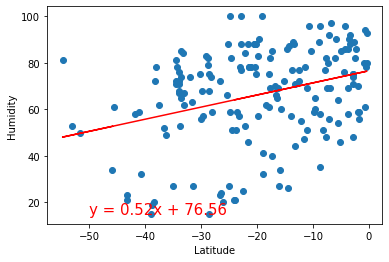

In [26]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', "Humidity",(-50,15))

### Relation between Lat and Cloudiness

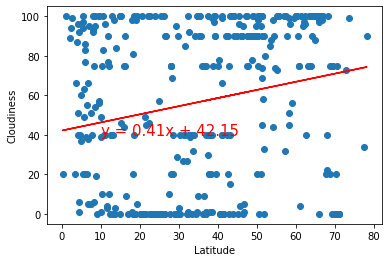

In [27]:
# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', "Cloudiness",(10,40))

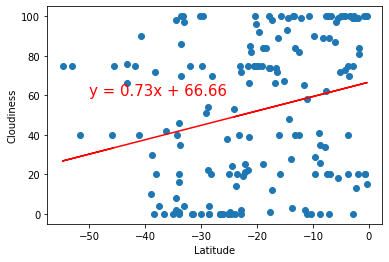

In [30]:
# Linear regression on the southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for % Cloudiness', "Cloudiness",(-50,60))

### Correlation Between Latitude and Wind Speed

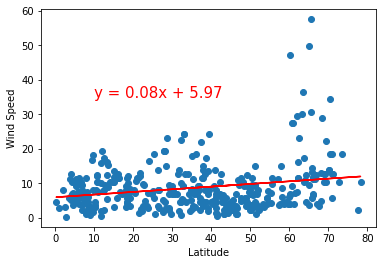

In [33]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', "Wind Speed",(10,35))

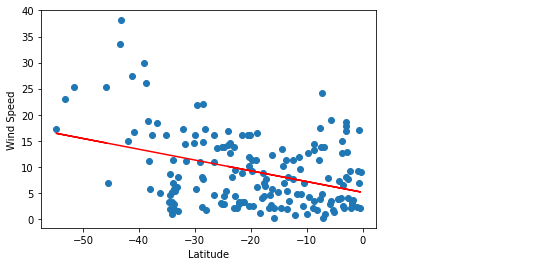

In [34]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', "Wind Speed",(10,35))